# Time Zone

In [1]:
import pytz

In [6]:
#select 5 common timezones
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [7]:
# get the current time at the specified time zone.
pytz.timezone('US/Eastern')

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

>> **Localization**

Localization is the first step towards standardizing the time zone. Any specific time stamp is first localized to a given time zone.

You will now learn how to set your datetime index to a specific time zone.

In [8]:
import pandas as pd
import random

In [11]:
import numpy as np

In [9]:
# an array of 6 dates are created for daily in timezone UTC starting from 9-18-2017  
timeZoneRng = pd.date_range('9/18/2017 9:30', periods=6, freq='D', tz='UTC')

The given timezone is localized to UTC using the tz= parameter.

You can also localize using the tz_localize() function.

In [13]:
# converting the array into time series table with 6 (len(timeZoneRng)) random numbers with index as the dates in timeZoneRng
timeZoneTs = pd.Series(np.random.randn(len(timeZoneRng)), index=timeZoneRng)

In [14]:
timeZoneTs.head()

2017-09-18 09:30:00+00:00   -1.701610
2017-09-19 09:30:00+00:00   -0.106054
2017-09-20 09:30:00+00:00   -1.274702
2017-09-21 09:30:00+00:00   -0.299764
2017-09-22 09:30:00+00:00    0.116124
Freq: D, dtype: float64

In [18]:
#to check timezone (index) of the databse
timeZoneTs.index.tz

<UTC>

In [19]:
#to check if leap year
timeZoneTs.index.is_leap_year

array([False, False, False, False, False, False])

>> **Conversion**

In the previous card, you have seen how to localize your date-time value to a particular time zone.

If you want to convert your date-time value to another time zone you can use the tz_convert function.

In [21]:
timeZoneTs.tz_convert('US/Eastern')

2017-09-18 05:30:00-04:00   -1.701610
2017-09-19 05:30:00-04:00   -0.106054
2017-09-20 05:30:00-04:00   -1.274702
2017-09-21 05:30:00-04:00   -0.299764
2017-09-22 05:30:00-04:00    0.116124
2017-09-23 05:30:00-04:00   -0.661014
Freq: D, dtype: float64

>> **Using Timestamp**

You can create date values and convert them to different time zones and also perform similar operations with time stamp values.

In [25]:
#explains how to create a sample timestamp using TimeStamp function, Localize and Convert the timestamp to the desired value.
sampleTimeStamp =  pd.Timestamp('2011-09-19 04:00')

timeStamp_utc = sampleTimeStamp.tz_localize('UTC')

timeStamp_utc

Timestamp('2011-09-19 04:00:00+0000', tz='UTC')

In [26]:
timeStamp_utc.tz_convert('US/Eastern')

Timestamp('2011-09-19 00:00:00-0400', tz='US/Eastern')

>> **Daylight Savings**

Some timezones follow the daylight savings concept whereas some don't

To offset the time based on Daylight Savings, you can use the DateOffset() function.

In [27]:
from pandas.tseries.offsets import Hour

In [32]:
# 30 minutes before DST transition
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [29]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [31]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [35]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [36]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

>> **Combining Different Timezones**

When you work in a Multi National Company, you can get data from different time zone. But you have to bring them to one standard for working.

In [39]:
dateRng = pd.date_range('9/19/2017 9:30', periods=10, freq='B')

timeSeries =  pd.Series(np.random.randn(len(dateRng)), index=dateRng)

timeSeries

2017-09-19 09:30:00   -0.510545
2017-09-20 09:30:00    0.274777
2017-09-21 09:30:00   -1.530613
2017-09-22 09:30:00    0.804268
2017-09-25 09:30:00   -1.632476
2017-09-26 09:30:00   -1.225726
2017-09-27 09:30:00   -1.037081
2017-09-28 09:30:00   -0.979512
2017-09-29 09:30:00    0.043820
2017-10-02 09:30:00    1.716750
Freq: B, dtype: float64

In [41]:
tz1 = timeSeries[:7].tz_localize('Asia/Singapore')
print(tz1)

tz2 = tz1[2:].tz_convert('Asia/Seoul')
print(tz2)

2017-09-19 09:30:00+08:00   -0.510545
2017-09-20 09:30:00+08:00    0.274777
2017-09-21 09:30:00+08:00   -1.530613
2017-09-22 09:30:00+08:00    0.804268
2017-09-25 09:30:00+08:00   -1.632476
2017-09-26 09:30:00+08:00   -1.225726
2017-09-27 09:30:00+08:00   -1.037081
Freq: B, dtype: float64
2017-09-21 10:30:00+09:00   -1.530613
2017-09-22 10:30:00+09:00    0.804268
2017-09-25 10:30:00+09:00   -1.632476
2017-09-26 10:30:00+09:00   -1.225726
2017-09-27 10:30:00+09:00   -1.037081
Freq: B, dtype: float64


In [42]:
combine = tz1 + tz2

combine.index

DatetimeIndex(['2017-09-19 01:30:00+00:00', '2017-09-20 01:30:00+00:00',
               '2017-09-21 01:30:00+00:00', '2017-09-22 01:30:00+00:00',
               '2017-09-25 01:30:00+00:00', '2017-09-26 01:30:00+00:00',
               '2017-09-27 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# Plotting

In [43]:
%matplotlib inline 

In [49]:
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')

sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()

sampleTs.head()
#This creates a sample time series for plotting.

2017-01-01    -5
2017-02-01   -10
2017-03-01   -20
2017-04-01   -23
2017-05-01   -30
Freq: MS, dtype: int32

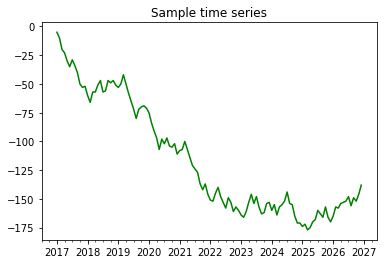

In [53]:
sampleTs.plot(c='g', title='Sample time series')
#n the above code, the time series is passed to the plot function. 
#The necessary aesthetics like color, gridline, and scale can also be passed.

Aggregation Plot 1

2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2023-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2025-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2027-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: 2A-DEC, dtype: object

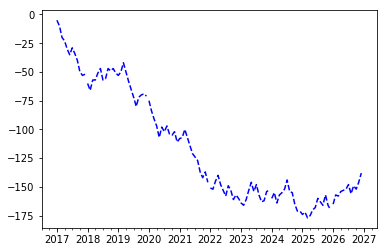

In [54]:
sampleTs.resample('2A').plot(c='b', ls='--')

#In the above code, we have done a resampling of the time series annually and then plotted the values.

Aggregation Plot 2

2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2022-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2027-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

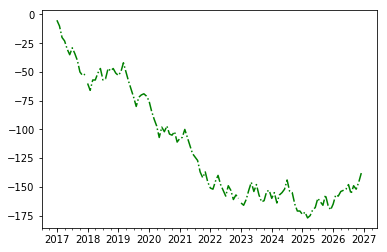

In [55]:
sampleTs.resample('5A').plot(c='g', ls='-.')

#In the above code, we have resampled further and then plot the values.

>> **Lag Plot**

The Lag Plot is a very important and useful visualization for Time Series Data.

Time Series is a Univariate Data.

In the lag plot, you plotted the actual data against the data with a time lag. This helps in determining how the current data is predicting the future data.

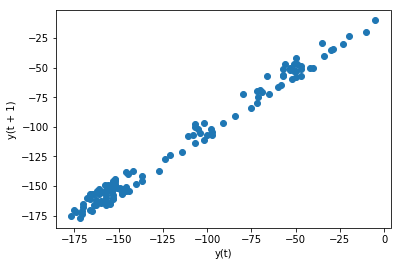

In [57]:
#The below code explains how to create a sample lag plot in Python
from pandas.plotting import lag_plot

lag_plot(sampleTs)

>> **Auto Correlation Plot**

In the lag plot, we have just seen how the data is scattered when plotted against one-time lag.

Autocorrelation plot goes one step further.

Auto Correlation refers to correlating the data with itself. Here we are correlating the data with a one-time lag.

The plot gives a more accurate picture of how the data point is correlated among themselves.

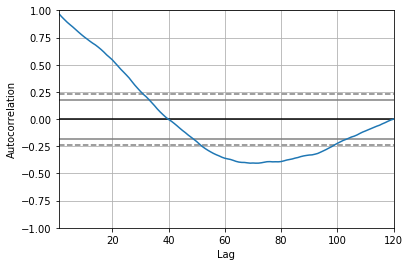

In [59]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(sampleTs)

#When the autocorrelation plot shows an exponential behavior, the time series is stationary.

# Stationarity

Stationarity is a very significant property in Time Series Analysis. In Time series, data is collected at different time intervals. The data might behave in a deterministic or stochastic nature.

Models can be applied only when your data is deterministic. If the nature of the data is stochastic then the model results will not be interpretable. Hence we have to check this property before applying the model.

In [60]:
#Let us create a sample random time series.
from statsmodels.tsa.stattools import adfuller

sampleRng = pd.date_range(start='2017', periods=120, freq='MS')

sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()


Applying ADF Test

In [61]:
tsResult = adfuller(sampleTs)

In [64]:
tsResult

(-0.8253785832175031,
 0.8115534084424083,
 0,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 664.0942674267325)

In [65]:
print('ADF Statistic: %f' % tsResult[0])

print('p-value: %f' % tsResult[1])

for key, value in tsResult[4].items():

    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.825379
p-value: 0.811553
	1%: -3.487
	5%: -2.886
	10%: -2.580


**Interpreting ADF Test Results**

The ADF Statistic value is -0.825379. It is negative.

The p-value: 0.811553 and is greater than 0.05 so we accept the null hypothesis, which means the data is non-stationary.